## IS 590 PR - Final Project 
### Analyzing Olympic Data Set from 1896 to 2016


/Users/rj/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


(271116, 15)
(219, 61)
(230, 3)
(217, 61)
(51, 7)
(270, 10)

The Dataframe "Olympics" has 271116 rows and 15 columns
Column Names - 'ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal' 


The Dataframe "World GDP" has 219 rows and 61 columns
Column Names - 'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016' 


The Dataframe "Country Codes" has 230 rows and 3 columns
Column Names - 'NOC', 'region', 'notes' 


The Dataframe "World Population" has 217 rows 

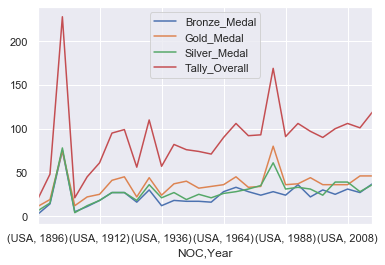

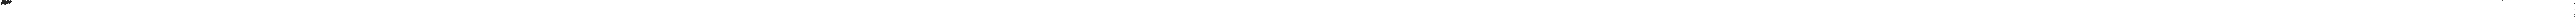

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[22]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
import pandas as pd
import dask.dataframe as ddf
import dask.multiprocessing
import warnings
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from Latest_Submission import *



#export PYTHONIOENCODING = UTF-8
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999



### Reading the Datasets (By Multiprocessing via Dask Dataframes ) -

In [2]:
world_gdp = read_data_df('world_gdp.csv', skiprows = 3)
noc_country = read_data_df('noc_regions.csv')
world_population = read_data_df('world_pop.csv')
olympics = read_data_df('athlete_events.csv') 
olympics_host = read_data_df('olm2.csv')
world_hdi = read_data_df('hdi.csv')




### Shape of the Dataframes
##### get_shape() function returns the rows and columns of Each Dataset 

In [3]:
print(get_shape(olympics))
print(get_shape(world_gdp))
print(get_shape(noc_country))
print(get_shape(world_population))
print(get_shape(olympics_host))
print(get_shape(world_hdi))

(271116, 15)
(219, 61)
(230, 3)
(217, 61)
(51, 7)
(270, 10)


### Assigning Names to the Dataframe

In [4]:
olympics.name = "Olympics"
world_gdp.name = "World GDP"
noc_country.name = "Country Codes"
world_population.name = "World Population"
olympics_host.name = "Olympics Host Countries"
world_hdi.name = "World HDI data"

### Description of the Dataframes

In [5]:
get_info(olympics)
get_info(world_gdp)
get_info(noc_country)
get_info(world_population)
get_info(olympics_host)
get_info(world_hdi)


The Dataframe "Olympics" has 271116 rows and 15 columns
Column Names - 'ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal' 


The Dataframe "World GDP" has 219 rows and 61 columns
Column Names - 'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016' 


The Dataframe "Country Codes" has 230 rows and 3 columns
Column Names - 'NOC', 'region', 'notes' 


The Dataframe "World Population" has 217 rows and 61 columns
Column Names - 'Country', 'Country Code', 'In

## Data Cleaning
### Missing Values

In [6]:
get_missing_values(olympics)

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
olympics['Medal'].fillna('No_Medal', inplace=True)

### Validating Datatypes

In [8]:
print(" \n \n{} Dataframe \n \n {} ".format(olympics.name,olympics.dtypes))
print(" {} Dataframe \n \n {} ".format(world_gdp.name,world_gdp.dtypes))
print(" {} Dataframe \n \n {} ".format(noc_country.name,noc_country.dtypes))
print(" {} Dataframe \n \n {} ".format(olympics_host.name,olympics_host.dtypes))
print(" {} Dataframe \n \n {} ".format(world_hdi.name,world_hdi.dtypes))
print(" {} Dataframe \n \n {} ".format(world_population.name,world_population.dtypes))
world_population[['1998','2000','2016']] = world_population[['1998','2000','2016']].astype(float)

 
 
Olympics Dataframe 
 
 ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object 
 World GDP Dataframe 
 
 Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
1961              float64
1962              float64
1963              float64
1964              float64
1965              float64
1966              float64
1967              float64
1968              float64
1969              float64
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981         

### One Hot Encoding of Medals Column

#### Reference -  https://www.datacamp.com/community/tutorials/categorical-data


In [9]:
olympics["Bronze_Medal"] = np.where(olympics["Medal"].str.contains("Bronze"), 1, 0)
olympics["Silver_Medal"] = np.where(olympics["Medal"].str.contains("Silver"), 1, 0)
olympics["Gold_Medal"]   = np.where(olympics["Medal"].str.contains("Gold"), 1, 0)
olympics["No_Medal"]     = np.where(olympics["Medal"].str.contains("No_Medal"), 1, 0)

In [10]:
world = world_gdp.drop(['Indicator Name', 'Indicator Code'], axis = 1)


### Merging Olympic Athletes Data with NOC

In [11]:
olympics_NOC = olympics.merge(noc_country, left_on='NOC' , right_on='NOC' , how ='left' )

### Cleaning Olympics Host data + Extracting years from it

In [12]:
olympics_host['Year'].fillna(-999, inplace=True)
olympics_host['Winter'].fillna("No_Olympics", inplace=True)
olympics_host['Summer (Olympiad)'].fillna("No_Olympics", inplace=True)
olympic_years = list(olympics_host["Year"].unique())
olympic_years = [str(int(element)) for element in olympic_years]



#### Merging World Population Data with Olympic Athletes (after filtering out the years where olympics wasn't held)

In [13]:
@jit
def filter_years(dataframe, years, olympic_years):
    for item in world_population_columns:
        if item not in olympic_years:
            dataframe.drop(item, axis=1, inplace=True)

In [14]:
world_population_columns = list(world_population.columns.values)[4:]

filter_years(world_population,world_population_columns ,olympic_years )
olympics_NOC_population = olympics_NOC.merge(world_population, left_on='NOC' , right_on='Country Code' , how ='left' ).reset_index(drop=True)


#### Merging World GDP Data with Olympic Athletes (after filtering out the years where olympics wasn't held)


In [15]:

world_gdp_columns = list(world_gdp.columns.values)[4:]

filter_years(world_gdp,world_gdp_columns,olympic_years )

olympics_NOC_gdp = olympics_NOC.merge(world_population, left_on='NOC' , right_on='Country Code' , how ='left' ).reset_index(drop=True)


### American Athletes vs World  - Medals Tally in Olympics . 

In [16]:

american_olympians = olympics_NOC.loc[(olympics_NOC.NOC=='USA') & (olympics_NOC.Medal=='Gold') & (olympics_NOC.Season=='Summer')]
american_olympians

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,Bronze_Medal,Silver_Medal,Gold_Medal,No_Medal,region,notes
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,...,Paris,Golf,Golf Women's Individual,Gold,0,0,1,0,USA,NaN
609,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,...,Sydney,Basketball,Basketball Men's Basketball,Gold,0,0,1,0,USA,NaN
710,404,"Louis Grenville ""Lou"" Abell",M,15.0,NaN,NaN,Vesper Boat Club,USA,1900 Summer,1900,...,Paris,Rowing,Rowing Men's Coxed Eights,Gold,0,0,1,0,USA,NaN
711,404,"Louis Grenville ""Lou"" Abell",M,19.0,NaN,NaN,Vesper Boat Club,USA,1904 Summer,1904,...,St. Louis,Rowing,Rowing Men's Coxed Eights,Gold,0,0,1,0,USA,NaN
739,423,Michael Brent Abernathy,M,22.0,182.0,84.0,United States,USA,2000 Summer,2000,...,Sydney,Baseball,Baseball Men's Baseball,Gold,0,0,1,0,USA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266319,133237,"Timothy R. ""Tim"" Young",M,26.0,172.0,77.0,United States,USA,2000 Summer,2000,...,Sydney,Baseball,Baseball Men's Baseball,Gold,0,0,1,0,USA,NaN
267204,133685,Mariel Leigh Zagunis,F,19.0,173.0,72.0,United States,USA,2004 Summer,2004,...,Athina,Fencing,"Fencing Women's Sabre, Individual",Gold,0,0,1,0,USA,NaN
267205,133685,Mariel Leigh Zagunis,F,23.0,173.0,72.0,United States,USA,2008 Summer,2008,...,Beijing,Fencing,"Fencing Women's Sabre, Individual",Gold,0,0,1,0,USA,NaN
269922,135045,Rbert Zimonyi,M,46.0,170.0,52.0,United States,USA,1964 Summer,1964,...,Tokyo,Rowing,Rowing Men's Coxed Eights,Gold,0,0,1,0,USA,NaN


#### We can see that the Gold medals won by America is 1127 , but the number os rows returned is 1951 . THis is due to medallists in team events being counted as individual medallists. Eg : - Soccer has 11 players , It will be counted as 11 medals instead of 1 .

#### Let's Find out Team Events

In [17]:
gold_medals = olympics_NOC[olympics_NOC.Gold_Medal==1]
gold = gold_medals.groupby(['Event','Year'])['ID'].count()
gold
gold_medals['Event_Frequency'] = gold_medals.groupby(['Event','Year'])['ID'].transform('count')
gold = gold_medals[gold_medals.Event_Frequency > 1]
team_events = gold["Event"].unique()
team_events

array(["Tug-Of-War Men's Tug-Of-War", "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Pommelled Horse", "Handball Women's Handball",
       "Speed Skating Men's 1,500 metres", 'Sailing Mixed 8 metres',
       "Cycling Men's Road Race, Team",
       "Canoeing Men's Kayak Fours, 1,000 metres",
       "Handball Men's Handball", "Football Men's Football",
       "Water Polo Men's Water Polo",
       'Sailing Mixed Two Person Heavyweight Dinghy',
       "Rowing Men's Quadruple Sculls", "Rowing Men's Double Sculls",
       "Rowing Men's Coxed Pairs", "Hockey Men's Hockey",
       "Basketball Men's Basketball", "Nordic Combined Men's Team",
       "Ice Hockey Men's Ice Hockey", "Rowing Men's Coxed Eights",
       "Baseball Men's Baseball", "Athletics Men's 4 x 400 metres Relay",
       "Gymnastics Men's Team All-Around, Free System",
       "Gymnastics Men's Team All-Around, Swedish System",
       "Bobsleigh Men's Two", "Curling Men's Curling",
       "Cycling Men's Team Pursuit

### Medals Tally of USA

In [18]:
tally = olympics_NOC[(olympics_NOC.No_Medal != 1) & (olympics_NOC.Season == "Summer")]
medal_tally = tally[[ 'NOC','Year', 'Sport', 'Event', 'Medal','Bronze_Medal','Silver_Medal', 'Gold_Medal']]

medal_tally_1 = medal_tally.drop_duplicates(['Medal','Event','Year'])

### Gold Medallists of USA - 


In [19]:
medal_tally_1[(medal_tally_1['Medal']=='Gold') & (medal_tally_1['NOC']=='USA')]

,NOC,Year,Sport,Event,Medal,Bronze_Medal,Silver_Medal,Gold_Medal
283,USA,1900,Golf,Golf Women's Individual,Gold,0,0,1
609,USA,2000,Basketball,Basketball Men's Basketball,Gold,0,0,1
710,USA,1900,Rowing,Rowing Men's Coxed Eights,Gold,0,0,1
711,USA,1904,Rowing,Rowing Men's Coxed Eights,Gold,0,0,1
739,USA,2000,Baseball,Baseball Men's Baseball,Gold,0,0,1
...,...,...,...,...,...,...,...,...
266222,USA,1952,Athletics,Athletics Men's Javelin Throw,Gold,0,0,1
266270,USA,1992,Athletics,Athletics Men's 400 metres Hurdles,Gold,0,0,1
266293,USA,1932,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",Gold,0,0,1
267204,USA,2004,Fencing,"Fencing Women's Sabre, Individual",Gold,0,0,1


### Silver Medallists of USA - 

In [20]:
medal_tally_1[(medal_tally_1['Medal']=='Silver') & (medal_tally_1['NOC']=='USA')]

,NOC,Year,Sport,Event,Medal,Bronze_Medal,Silver_Medal,Gold_Medal
186,USA,2004,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver,0,1,0
286,USA,2008,Softball,Softball Women's Softball,Silver,0,1,0
311,USA,2004,Taekwondo,Taekwondo Women's Featherweight,Silver,0,1,0
1450,USA,1912,Athletics,Athletics Men's Standing High Jump,Silver,0,1,0
1462,USA,1904,Swimming,Swimming Men's Plunge For Distance,Silver,0,1,0
1512,USA,1912,Athletics,Athletics Men's Standing Long Jump,Silver,0,1,0
1845,USA,2012,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Silver,0,1,0
2352,USA,2008,Volleyball,Volleyball Women's Volleyball,Silver,0,1,0
2467,USA,1992,Swimming,Swimming Women's 100 metres Butterfly,Silver,0,1,0
3021,USA,2012,Volleyball,Volleyball Women's Volleyball,Silver,0,1,0


### Bronze Medal Tally of USA - 

In [21]:
medal_tally_1[(medal_tally_1['Medal']=='Bronze') & (medal_tally_1['NOC']=='USA')]

,NOC,Year,Sport,Event,Medal,Bronze_Medal,Silver_Medal,Gold_Medal
1451,USA,1912,Athletics,Athletics Men's Standing Long Jump,Bronze,1,0,0
1514,USA,2016,Volleyball,Volleyball Women's Volleyball,Bronze,1,0,0
1847,USA,2016,Swimming,Swimming Men's 50 metres Freestyle,Bronze,1,0,0
1848,USA,2016,Swimming,Swimming Men's 100 metres Freestyle,Bronze,1,0,0
3095,USA,2016,Fencing,"Fencing Women's Sabre, Team",Bronze,1,0,0
4273,USA,1952,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze,1,0,0
4471,USA,1932,Fencing,"Fencing Men's Foil, Team",Bronze,1,0,0
4966,USA,1996,Baseball,Baseball Men's Baseball,Bronze,1,0,0
5043,USA,1920,Polo,Polo Men's Polo,Bronze,1,0,0
5049,USA,2008,Rowing,Rowing Men's Coxed Eights,Bronze,1,0,0


### Visualising Overall Tally with individual Medals (Gold, Silver, Bronze)

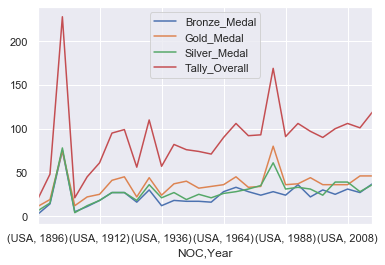

In [22]:
medal_tally_1['Tally_Overall'] = medal_tally_1['Bronze_Medal'].astype(int)+medal_tally_1['Silver_Medal'].astype(int)+medal_tally_1['Gold_Medal'].astype(int)
sns.set()
medal_tally_usa = medal_tally_1[medal_tally_1['NOC']=='USA']
medal_tally_usa=pd.pivot_table(medal_tally_usa, index=['NOC','Year'],values=['Bronze_Medal','Silver_Medal','Gold_Medal','Tally_Overall'],aggfunc=np.sum)
medal_tally_usa.plot()




### USA's Medal Tally by Year (sorted by Medal Tally )

In [23]:
medal_tally_usa.sort_values('Tally_Overall',ascending=False)


Bronze_Medal  Gold_Medal  Silver_Medal  Tally_Overall
NOC Year                                                       
USA 1904            75          75            78            228
    1984            28          80            61            169
    2016            37          46            36            119
    1932            30          44            36            110
    2008            31          36            39            106
    1968            33          45            28            106
    1992            36          37            33            106
    2012            27          46            28            101
    2004            25          36            39            100
    1924            27          45            27             99
    1996            22          44            31             97
    1920            27          41            27             95
    1976            24          34            35             93
    1972            28          33            31             92
    1988            24          36            31             91
    2000            30          36            24             90
    1964            28          36            26             90
    1948            18          37            27             82
    1952            17          40            19             76
    1956            17          32            25             74
    1960            16          34            21             71
    1912            18          25            18             61
    1936            12          24            21             57
    1928            16          22            18             56
    1900            14          19            15             48
    1908            11          22            12             45
    1906             5          12             4             21
    1896             2          11             6             19


### Medal Tally of All Countries By Year (Sorted by Overall Tally)


In [24]:
medal_tally_by_year=pd.pivot_table(medal_tally_1, index=['NOC','Year'],values=['Bronze_Medal','Silver_Medal','Gold_Medal','Tally_Overall'],aggfunc=np.sum)

medal_tally_by_year.sort_values('Tally_Overall',ascending=False)

Bronze_Medal  Gold_Medal  Silver_Medal  Tally_Overall
NOC Year                                                       
USA 1904            75          75            78            228
URS 1980            43          79            68            190
USA 1984            28          80            61            169
GBR 1908            36          56            49            141
URS 1988            41          53            31            125
...                ...         ...           ...            ...
POR 1936             1           0             0              1
    1928             1           0             0              1
    1924             1           0             0              1
GAB 2012             0           0             1              1
AHO 1988             0           0             1              1

[1243 rows x 4 columns]

### Medal Tally of All Countries Overall (1896 - 2016) (Sorted by Overall Tally)

In [25]:
medal_tally_overall=pd.pivot_table(medal_tally_1, index=['NOC'],values=['Bronze_Medal','Silver_Medal','Gold_Medal','Tally_Overall'],aggfunc=np.sum)
medal_tally_overall = medal_tally_overall.sort_values('Tally_Overall',ascending=False)
medal_tally_overall

,Bronze_Medal,Gold_Medal,Silver_Medal,Tally_Overall
NOC,,,,
USA,678,1028,796,2502
URS,270,385,311,966
GBR,276,275,312,863
GER,257,229,259,745
FRA,259,233,248,740
ITA,189,218,191,598
CHN,138,226,160,524
SWE,180,148,172,500
AUS,187,145,167,499


### Pie Chart of Medal Distribution of top 20 Countries

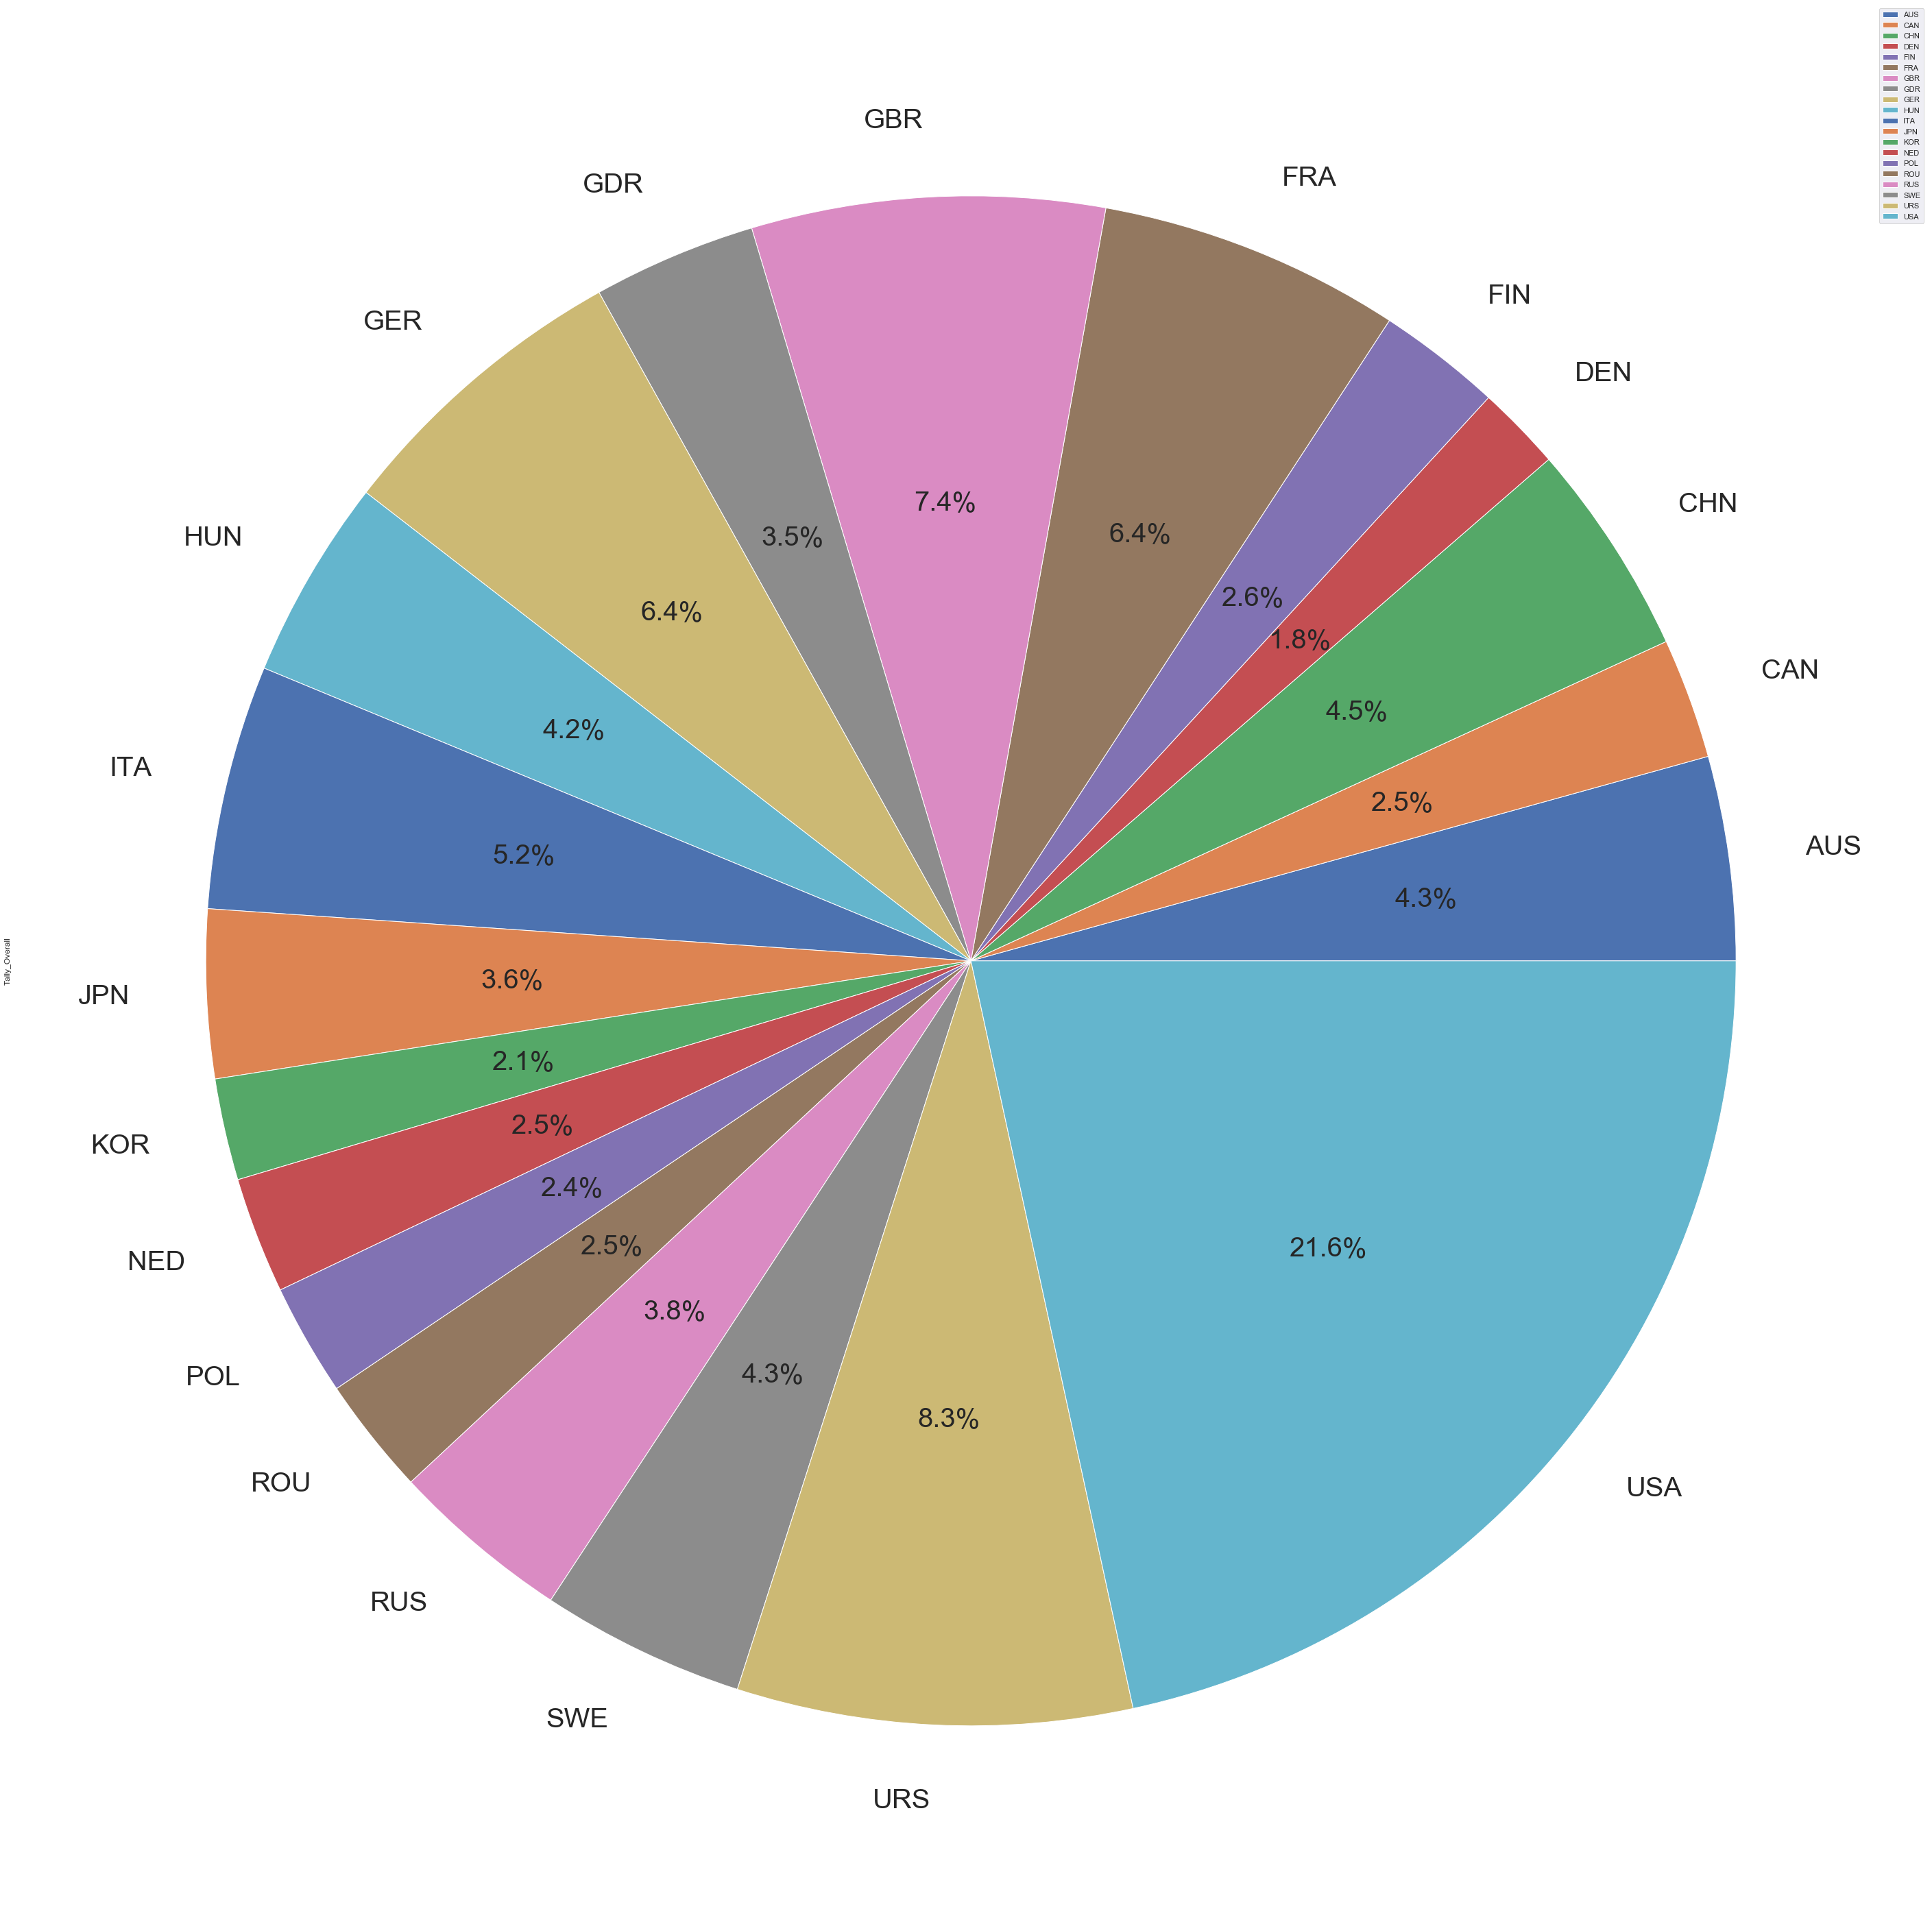

In [26]:
sns.set()

medal_tally_overall=pd.pivot_table(m.head(20), index=['NOC'],values=['Tally_Overall'],aggfunc=np.sum).plot(kind='pie',subplots=True,figsize=(50,100),
       autopct='%1.1f%%',textprops={'fontsize': 40})

### Home Advantage
##### Countries actively place lucrative bids to get the hosting rights of every Olympics edition . Apart from Socio-political and economic reasons , we try to explore whether Home advantage impacts a given country's medals tally as well
##### Based on the previous and next olympics' medal tally, we can clearly see the home advantage enjoyed by the host country in the below table.

##### Inspired from - https://www.kaggle.com/chadalee/olympics-data-cleaning-exploration-prediction

### Olympics host Countries 

In [27]:
olympic_host_noc= olympics_host.merge(noc_country, left_on='Country' , right_on=u'region' , how ='left' )

olympic_host_noc = olympic_host_noc.drop_duplicates(['Country','Year','Summer (Olympiad)'])
olympic_host_noc = olympic_host_noc.drop_duplicates(['Country','Year','Winter'])
olympic_host_noc = olympic_host_noc.drop_duplicates(['Country','Year'] , keep='last')
olympic_host_noc = olympic_host_noc[['Year', 'NOC']]
olympic_host_noc.columns = ['Year_of_Hosting', 'Host_Country_code']
olympic_host_noc

,Year_of_Hosting,Host_Country_code
0,1896,CRT
2,1900,FRA
3,1904,USA
4,1908,GBR
5,1912,SWE
6,1920,BEL
8,1924,FRA
9,1928,SUI
10,1928,NED
12,1932,USA


### Medal Tally along with Previous and Next Year Tally

In [28]:

medal_tally_by_year.reset_index(inplace=True)
medal_tally_by_year = medal_tally_by_year[['NOC', 'Year','Tally_Overall']]
total_medals = medal_tally_by_year[['NOC','Year','Tally_Overall']]


from numba import jit
#https://stackoverflow.com/questions/34855859/is-there-a-way-in-pandas-to-use-previous-row-value-in-dataframe-apply-when-previ

@jit
def previous_year(tally):
    new_tally = np.empty(tally.shape)
    new_tally[0] =0
    for i in range(1, new_tally.shape[0]):
        new_tally[i] = tally[i-1]
    return new_tally

def next_year(tally):
    new_tally = np.empty(tally.shape)
    new_tally[tally.shape[0]-1] =0
    for i in range(0, new_tally.shape[0]-1):
        new_tally[i] = tally[i+1]
    return new_tally

total_medals['Previous_Year_Tally'] = previous_year(total_medals['Tally_Overall'])
total_medals['Next_Year_Tally'] = next_year(total_medals['Tally_Overall'])

host_country_tally = olympic_host_noc.merge(total_medals , left_on = [ 'Host_Country_code','Year_of_Hosting'] 
                                           , right_on =['NOC', 'Year'] , how = 'left' )


host = host_country_tally.dropna()
host=host[['Year_of_Hosting', 'Host_Country_code','Previous_Year_Tally', 'Tally_Overall', 'Next_Year_Tally']]
host




,Year_of_Hosting,Host_Country_code,Previous_Year_Tally,Tally_Overall,Next_Year_Tally
1,1900,FRA,11.0,95.0,2.0
2,1904,USA,48.0,228.0,21.0
3,1908,GBR,25.0,141.0,41.0
4,1912,SWE,24.0,63.0,63.0
5,1920,BEL,6.0,40.0,13.0
6,1924,FRA,42.0,38.0,25.0
7,1928,SUI,25.0,17.0,1.0
8,1928,NED,11.0,23.0,8.0
9,1932,USA,56.0,110.0,57.0
11,1948,SUI,17.0,22.0,13.0


### Can we Predict the Overall Medal Tally of a given country ?

##### Research Paper - "Standards on age, height and weight in Olympic running events for men" -  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1859632/?page=2 

##### The Research Paper nails down 6 essential factors when it comes to influencing the medal tally of a given country
##### They are as follows - 

![Medal_Tally.png](attachment:Medal_Tally.png)


##### We try to fit a linear regression line having GDP , Population , GDP per Capita and No of athletes of a given country and see how our Predictor Works. 

##### Inspired By - https://www.kaggle.com/chadalee/olympics-data-cleaning-exploration-prediction

In [29]:
predictor = medal_tally_by_year

### Merging GDP Data with Year of Participation of the country

In [30]:
gdp = olympics_NOC_gdp.drop_duplicates(['Country','Year'])
gdp =  gdp.drop(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Bronze_Medal',
       'Silver_Medal', 'Gold_Medal', 'No_Medal', 'region', 'notes', 'Country',
       'Country Code', 'Indicator Name', 'Indicator Code'],axis=1)
gdp.dropna(inplace=True)
gdp = gdp[gdp.Year>=1960]
pivot_gdp = pd.melt(world, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'GDP') #inspired
pivot_gdp.dropna(inplace=True)

pivot_gdp


,Country Name,Country Code,Year,GDP
0,Afghanistan,AFG,1960,5.377778e+08
2,Algeria,DZA,1960,2.723649e+09
10,Australia,AUS,1960,1.859335e+10
11,Austria,AUT,1960,6.592694e+09
13,Bahamas,BHS,1960,1.698039e+08
...,...,...,...,...
12477,Vietnam,VNM,2016,2.052760e+11
12479,Palestine,PSE,2016,1.339710e+10
12480,Yemen,YEM,2016,2.731761e+10
12481,Zambia,ZMB,2016,2.106399e+10


### Merging Population Data with Year of Participation of the country

In [31]:
pop = world_population.drop(world_population.columns[[2, 3]], axis=1)
pivot_pop = pd.melt(pop, id_vars = ['Country', 'Country Code'], var_name = 'Year', value_name = 'Population') #inspired
pivot_pop

,Country,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0
...,...,...,...,...
4552,Kosovo,XKX,2016,1816200.0
4553,"Yemen, Rep.",YEM,2016,27584213.0
4554,South Africa,ZAF,2016,55908865.0
4555,Zambia,ZMB,2016,16591390.0


### Merged Frame with Corresponding GDP , Population and GDP Per-capita income with Year of Participation of the country

In [32]:
gdp_pop = pivot_gdp.merge(pivot_pop,left_on =['Country Code' , 'Year'],right_on = ['Country Code' , 'Year'] , how='left' )
gdp_pop.drop_duplicates(['Country Code', 'Year' ])
gdp_pop.dropna(inplace=True)

gdp_pop = gdp_pop[['Country Name' , 'Country Code' , 'Year' , 'GDP' , 'Population']]
gdp_pop
predictor['Year'] = predictor['Year'].astype('str')
pred = gdp_pop.merge(predictor, left_on =['Country Code', 'Year'] , right_on = ['NOC' , 'Year'] , how ='left' )
predictor['Year'] = predictor['Year'].astype('str')
pred.dropna()
pred['Per_Capita_GDP'] = pred['GDP']/pred['Population']
pred.dropna(inplace=True)
pred
#predictor['Population']= g[(predictor['Year']==g['Year']) & (predictor['NOC']== g['NOC'])]['Team']

,Country Name,Country Code,Year,GDP,Population,NOC,Tally_Overall,Per_Capita_GDP
2,Australia,AUS,1960,1.859335e+10,1.027648e+07,AUS,21.0,1809.311452
3,Austria,AUT,1960,6.592694e+09,7.047539e+06,AUT,2.0,935.460427
6,Belgium,BEL,1960,1.165872e+10,9.153489e+06,BEL,4.0,1273.691659
12,Brazil,BRA,1960,1.516557e+10,7.220755e+07,BRA,2.0,210.027470
17,Canada,CAN,1960,4.109345e+10,1.790901e+07,CAN,1.0,2294.568814
32,Finland,FIN,1960,5.224102e+09,4.429634e+06,FIN,5.0,1179.353011
33,France,FRA,1960,6.265147e+10,4.681424e+07,FRA,5.0,1338.299606
35,Ghana,GHA,1960,1.217230e+09,6.652287e+06,GHA,1.0,182.979191
42,India,IND,1960,3.653593e+10,4.494806e+08,IND,1.0,81.284764
44,Iraq,IRQ,1960,1.684122e+09,7.289761e+06,IRQ,1.0,231.025617


### Correlation Matrix of the variables

#### We can see that GDP , Population and Per_Capita_GDP have positive correlation with the medals tally with GDP showing the highest correlation (0.67)

In [33]:
correlation_matrix = pred.corr()
correlation_matrix.style.background_gradient(cmap='seismic')

,GDP,Population,Tally_Overall,Per_Capita_GDP
GDP,1,0.348838,0.674394,0.357441
Population,0.348838,1,0.350107,-0.0958071
Tally_Overall,0.674394,0.350107,1,0.200959
Per_Capita_GDP,0.357441,-0.0958071,0.200959,1


### Normalise and Classify the models 
#### We need to normalise the input data as there is high variance in them
#### We will use MinMax Scaler to Normalise the data


###  Classifer - 
#### We will use linear regression to predict the medal tally of the country


In [34]:
#Classifier 

scaler = preprocessing.MinMaxScaler()
A = pred[['GDP', 'Population' , 'Per_Capita_GDP']]
A = scaler.fit_transform(A)
B = pred['Tally_Overall']

model = sm.OLS(B, A)
results_model = model.fit()
print(results.summary())

B_predicted = results_model.predict(A)
rmse = np.sqrt(metrics.mean_squared_error(B, B_predicted))
print(rmse)


                                 OLS Regression Results                                
Dep. Variable:          Tally_Overall   R-squared (uncentered):                   0.694
Model:                            OLS   Adj. R-squared (uncentered):              0.679
Method:                 Least Squares   F-statistic:                              46.44
Date:                Thu, 02 Jan 2020   Prob (F-statistic):                    2.50e-20
Time:                        22:57:13   Log-Likelihood:                         -342.70
No. Observations:                  86   AIC:                                      693.4
Df Residuals:                      82   BIC:                                      703.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### We can see that R-Squared Value of linear Regression is 0.59 (59% accuracy) and RMSE is 15.7 which means the predictor is predicting with an error of 15 medals.
#### Can we Improve this preformance ? 

#### Let's try to predict with Random Forest Regression and see it's performance.

### Random Forest Regression

Random Forest Regression : 0.94
RMSE Of Random Forest Regressor 4.963886585676691


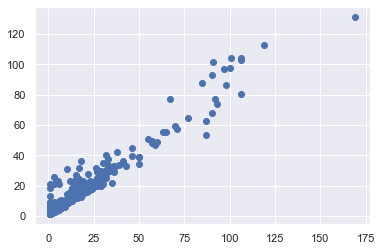

In [35]:
reg = RandomForestRegressor(n_estimators=100)
reg.fit(A, B)

print("Random Forest Regression : {:.2f}".format(reg.score(A, B)))
B_predict = reg.predict(A)

rmse = np.sqrt(metrics.mean_squared_error(B, B_predict))
print("RMSE Of Random Forest Regressor " + str(rmse) )
plt.scatter(B, B_predict)

#gdp['Population'] = str(list(gdp['Year'].values))

#### We can see that R-Squared Value of Random Forest Regression is 0.94 (94% accuracy) and RMSE is 4.85 which means the predictor is predicting with an error of 5 medals.

#### There is a drastic increase in the accuracy with Random Forest Regression

## HDI  (Human Development Index)

### Let's investigate whether HDI has an impact on Medal Tally. In our dataset , we have HDI Data for 3 Olympics years - 1980 , 2000 and 2008

### Merging HDI data with NOC Data 

In [36]:
world_hdi.dropna(inplace=True)
pivot_hdi = pd.melt(world_hdi, id_vars = ['HDI'], value_name = 'Human_Dev_Index') #inspired
pivot_hdi.dropna(inplace=True)
pivot_hdi_noc = pivot_hdi.merge(noc_country , left_on ='HDI' , right_on='region' , how='left' ) 

pivot_hdi_noc.drop_duplicates(['variable','region','HDI'],keep='last')

pivot_hdi_noc = pivot_hdi_noc[['NOC', 'variable' , 'Human_Dev_Index' ,'HDI' ]]
pivot_hdi_noc.dropna(inplace=True)
pivot_hdi_noc.columns = ['NOC_HDI','Year_HDI', 'Human_Dev_Index' ,'Country_HDI' ]
pivot_hdi_noc

,NOC_HDI,Year_HDI,Human_Dev_Index,Country_HDI
0,AFG,1980,0.198,Afghanistan
1,ALG,1980,0.454,Algeria
2,ARG,1980,0.669,Argentina
3,ANZ,1980,0.850,Australia
4,AUS,1980,0.850,Australia
5,AUT,1980,0.740,Austria
6,BRN,1980,0.651,Bahrain
7,BAN,1980,0.303,Bangladesh
8,BEL,1980,0.757,Belgium
9,BIZ,1980,0.619,Belize


In [37]:

pred = pred.merge(pivot_hdi_noc , left_on=['Country Name' ,'Year'] , right_on = ['Country_HDI','Year_HDI'] ,how='left' )
pred.dropna(inplace=True)
pred

,Country Name,Country Code,Year,GDP,Population,NOC,Tally_Overall,Per_Capita_GDP,NOC_HDI,Year_HDI,Human_Dev_Index,Country_HDI
120,Australia,AUS,1980,1.498870e+11,1.469200e+07,AUS,9.0,10201.946638,ANZ,1980,0.850,Australia
121,Australia,AUS,1980,1.498870e+11,1.469200e+07,AUS,9.0,10201.946638,AUS,1980,0.850,Australia
122,Austria,AUT,1980,8.205891e+10,7.549433e+06,AUT,4.0,10869.546424,AUT,1980,0.740,Austria
123,Belgium,BEL,1980,1.275080e+11,9.859242e+06,BEL,1.0,12932.840070,BEL,1980,0.757,Belgium
124,Brazil,BRA,1980,2.350250e+11,1.211598e+08,BRA,4.0,1939.794186,BRA,1980,0.549,Brazil
126,Finland,FIN,1980,5.368505e+10,4.779535e+06,FIN,8.0,11232.274564,FIN,1980,0.759,Finland
127,France,FRA,1980,7.035250e+11,5.534078e+07,FRA,13.0,12712.595930,FRA,1980,0.722,France
128,Guyana,GUY,1980,6.032000e+08,7.801530e+05,GUY,1.0,773.181671,GUY,1980,0.501,Guyana
129,India,IND,1980,1.838400e+11,6.967835e+08,IND,1.0,263.840914,IND,1980,0.344,India
130,Ireland,IRL,1980,2.177390e+10,3.412800e+06,IRL,2.0,6380.069479,IRL,1980,0.735,Ireland


#### Correlation Matrix with HDI

In [38]:
correlation_matrix = pred.corr()
correlation_matrix.style.background_gradient(cmap='seismic')

,GDP,Population,Tally_Overall,Per_Capita_GDP,Human_Dev_Index
GDP,1,0.457163,0.642159,0.193817,0.169667
Population,0.457163,1,0.571119,-0.27975,-0.395806
Tally_Overall,0.642159,0.571119,1,0.0403584,0.132623
Per_Capita_GDP,0.193817,-0.27975,0.0403584,1,0.751846
Human_Dev_Index,0.169667,-0.395806,0.132623,0.751846,1


#### Although not significant , HDI does have a positive correlation with the Medal Tally. 
#### Let's investigate to see if it could help us predict the medal tally better

In [39]:

MinMax = preprocessing.MinMaxScaler()
A = pred[['GDP', 'Population' , 'Per_Capita_GDP','Human_Dev_Index']]
A = MinMax.fit_transform(A)
B = pred['Tally_Overall']
model = sm.OLS(B, A)
results = model.fit()
print(results.summary())
B_predicted = results.predict(A)
rmse = np.sqrt(metrics.mean_squared_error(B, B_predicted))
print(rmse)
print("\n \nRMSE Of Linear Regressor " + str(rmse) )


                                 OLS Regression Results                                
Dep. Variable:          Tally_Overall   R-squared (uncentered):                   0.694
Model:                            OLS   Adj. R-squared (uncentered):              0.679
Method:                 Least Squares   F-statistic:                              46.44
Date:                Thu, 02 Jan 2020   Prob (F-statistic):                    2.50e-20
Time:                        22:57:16   Log-Likelihood:                         -342.70
No. Observations:                  86   AIC:                                      693.4
Df Residuals:                      82   BIC:                                      703.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

####  R-Squared Value of linear Regression is 0.69 (69% accuracy) and RMSE is 13 which means the predictor is predicting with an error of 13 medals.

#### Random Forest Regression - 


 
Random Forest Regression Fit: 0.96

 
RMSE Of Random Forest Regressor 3.831036352592301


Text(0.5, 1.0, 'Scatter Plot for Random Forrest Regressor')

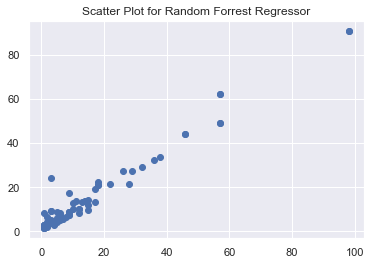

In [40]:

reg = RandomForestRegressor(n_estimators=100)
reg.fit(A, B)

B_predict = reg.predict(A)


rmse = np.sqrt(metrics.mean_squared_error(B, B_predict))
print("\n \nRandom Forest Regression Fit: {:.2f}".format(reg.score(A, B)))
print("\n \nRMSE Of Random Forest Regressor " + str(rmse) )
plt.scatter(B, B_predict)
plt.title("Scatter Plot for Random Forrest Regressor")

#### R-Squared Value of Random Forest Regression is 0.96 (96% accuracy) and RMSE is 3.8 which means the predictor is predicting with an error of 4 medals.

#### Again, Random Forest Regression performs better than Linear Regression

### Interesting Stat - 

### How far were the cities that hosted Olympics Each Year from the city that hosted the previous year?

#### (Vectorisation + Numba jit compiler)

In [41]:
#interesting Stat - 

#how far were the cities that hosted Olympics Each Year?

from pygeodesy.ellipsoidalVincenty import LatLon
from pygeodesy.utily import m2km
@jit
def getroutedistance(host_latitude, host_longitude) :
      latitude = list(host_latitude)
      longitude = list(host_longitude)
      distance = []
      distance.append(0)
      for i in range(0,len(latitude)-1):
           # print(latitude[i], longitude[i],latitude[i+1], longitude[i+1])
            source = LatLon(latitude[i], longitude[i])
            destination = LatLon(latitude[i+1], longitude[i+1]) 
            distance.append(m2km(source.distanceTo(destination)))
            #distance.append(m2km(distance))
            #print(distance)
      return distance


olympics_host['distance(KM)'] = getroutedistance(olympics_host['latitude'],olympics_host['longitude'] )

olympics_host

,Host City,Country,Summer (Olympiad),Winter,Year,latitude,longitude,distance(KM)
0,Athens,Greece,I,No_Olympics,1896,37.983333,23.733334,0.000000
1,Paris,France,II,No_Olympics,1900,48.853410,2.348800,2099.511571
2,St. Louis,USA,III,No_Olympics,1904,38.627273,-90.197891,7071.809034
3,London,UK,IV,No_Olympics,1908,51.508415,-0.125533,6777.412442
4,Stockholm,Sweden,V,No_Olympics,1912,59.332577,18.064903,1436.294773
5,Antwerp,Belgium,VII,No_Olympics,1920,51.216667,4.416666,1247.905649
6,Chamonix,France,No_Olympics,I,1924,45.923700,6.869400,615.695252
7,Paris,France,VIII,No_Olympics,1924,48.853410,2.348800,471.639331
8,St. Moritz,Switzerland,No_Olympics,II,1928,46.490800,9.835500,620.202491
9,Amsterdam,Netherlands,IX,No_Olympics,1928,52.307500,4.972222,736.562958


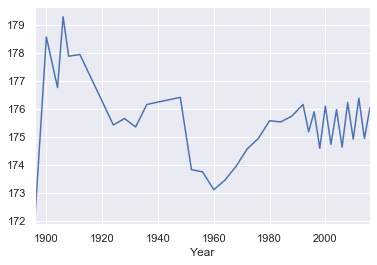

In [42]:
historical = olympics_NOC.dropna(subset=['Height','Weight']).reset_index()
history_height_mean = historical.groupby(['Year'])['Height'].mean()
history_height_mean.plot()

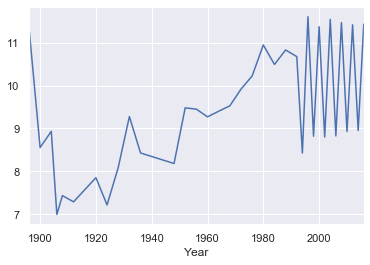

In [43]:
history_height_std = historical.groupby(['Year'])['Height'].std()
history_height_std.plot()

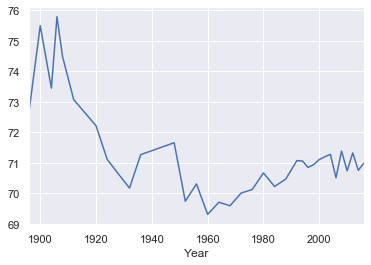

In [44]:
history_weight_mean = historical.groupby(['Year'])['Weight'].mean()
history_weight_mean.plot()


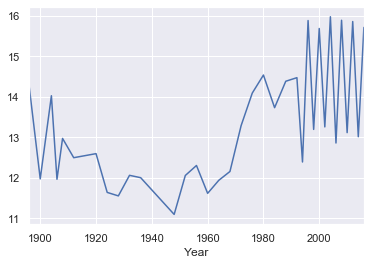

In [45]:
history_weight_std = historical.groupby(['Year'])['Weight'].std()
history_weight_std.plot()


## We Analyse the Claims made by a Research Paper based on 1972 Olympics , when it comes to the Height , Weight and Age of the athletes
#### Research Paper - "Standards on age, height and weight in Olympic running events for men"
#### The paper claims that Medalists in 100m Sprint event are Taller and heavier than other participants.
#### Additionally, we try to explore this claim for Age and BMI as well.
#### Overall Participants Average Height ,Height of the Gold Medalist and Height of All Medalists ( Gold , Silver , Bronze ) of 100m Running Event From 1896 -2016


In [46]:
def sprinter_stats(olympics, paramater):
    """
    >>> sprinter_Height()
    Traceback (most recent call last):
    ...
    TypeError: sprinter_Height() missing 1 required positional argument: 'summer_olympics'

    >>> sprinter_Height('unknown.dataframe')
    Traceback (most recent call last):
    ...
    TypeError: string indices must be integers

    >>> sprinter_Height(PandasDF)
    Traceback (most recent call last):
    ...
    NameError: name 'PandasDF' is not defined

    >>> sprinter_Height('unknown.dataframe', 'country','host')
    Traceback (most recent call last):
    ...
    TypeError: sprinter_Height() takes 1 positional argument but 3 were given

    >>> sprinter_Height(df, unknown_argument , another )
    Traceback (most recent call last):
    ...
    NameError: name 'df' is not defined

    :param summer_olympics:
    :return:
    """

    sprinters = olympics[(olympics['Event']=="Athletics Men's 100 metres")]
    sprinters_height  = sprinters.groupby(['Year'])[paramater].mean()

    sprinters_gold = olympics[(olympics['Medal']=='Gold') & (olympics['Event']=="Athletics Men's 100 metres")]
    sprinters_gold
    sprinters_gold_height = sprinters_gold.groupby(['Year'])[paramater].mean()

    #sprinters_medal = summer_olympics[(summer_olympics['Medal'].isin('Gold','Silver','Bronze')
                                          #     & (summer_olympics['Event']=="Athletics Men's 100 metres")]
    med=['Gold','Silver','Bronze']
    sprinters_medal = olympics[(olympics['Medal'].isin(med)) & (olympics['Event']=="Athletics Men's 100 metres")]

    sprinters_medal_Height = sprinters_medal.groupby(['Year'])[paramater].mean()

    sprint = pd.merge(sprinters_height, sprinters_gold_height, on=['Year']).reset_index()

    sprint = pd.merge(sprint, sprinters_medal_Height, on=['Year'])

    sprint.columns = ['Year', 'Overall Participants Average', 'Gold Medalists', 'All Medalists']
    #Athletics Men's 100 metres
    return sprint

In [47]:
sprinter_stats(olympics_NOC , 'Height')

,Year,Overall Participants Average,Gold Medalists,All Medalists
0,1896,176.285714,183.0,173.333333
1,1900,175.714286,167.0,176.000000
2,1904,176.333333,167.0,174.500000
3,1906,177.181818,167.0,171.000000
4,1908,176.500000,170.0,174.000000
5,1912,177.787879,182.0,177.666667
6,1920,178.000000,172.0,175.000000
7,1924,172.615385,183.0,175.333333
8,1928,174.500000,170.0,177.000000
9,1932,175.541667,170.0,176.333333


In [48]:
sprinter_stats(olympics_NOC , 'Weight')

,Year,Overall Participants Average,Gold Medalists,All Medalists
0,1896,70.857143,66.0,63.666667
1,1900,67.571429,58.0,64.333333
2,1904,68.833333,64.0,67.500000
3,1906,70.090909,64.0,67.000000
4,1908,69.368421,61.0,66.333333
5,1912,69.200000,73.0,70.000000
6,1920,71.076923,75.0,76.000000
7,1924,67.195652,75.0,66.666667
8,1928,67.360000,56.0,71.666667
9,1932,70.117647,65.0,73.333333


In [49]:
sprinter_stats(olympics_NOC , 'Age')



,Year,Overall Participants Average,Gold Medalists,All Medalists
0,1896,23.000000,21.0,22.500000
1,1900,21.833333,21.0,22.666667
2,1904,22.909091,23.0,21.000000
3,1906,23.928571,25.0,26.000000
4,1908,22.530612,19.0,22.333333
5,1912,22.492754,22.0,21.000000
6,1920,23.036364,19.0,21.666667
7,1924,23.185714,24.0,24.666667
8,1928,22.476923,19.0,21.666667
9,1932,23.074074,23.0,22.333333


## References

### Datasets 

##### Olympics Dataset , NOC -  https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

##### GDP Dataset -  https://datahub.io/core/gdp

##### Population Dataset - https://vizhub.com/celtic660/datasets/world_pop


### Books and Research Papers 

##### 1. Jake VanderPlas. 2016. <em>Python Data Science Handbook: Essential Tools for Working with Data</em> (1st ed.). O'Reilly Media, Inc.
##### 2.  McKinney: "Python for Data Analysis", 2nd Edition, by Wes McKinney, ©2017.
##### 3. “Going for Gold Medals: Factors affecting Olympic Performance” -
“https://www.researchgate.net/publication/278585677_Going_for_Gold_Medals_Factors_affecting_Olympic_Performance
##### 4."Standards on age, height and weight in Olympic running events for men" -  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1859632/?page=2

### Online References 

##### 1. https://en.wikipedia.org/wiki/Olympic_Games
##### 2. https://stackoverflow.com/  
##### 3. https://www.olympic.org/
##### 4. https://towardsdatascience.com/understanding-the-need-for-optimization-when-using-pandas-8ce23b83330c
##### 5. https://www.kaggle.com/chadalee/olympics-data-cleaning-exploration-prediction
##### 6. https://www.kaggle.com/pavanraj159/olympics-history-1896-2016
##### 7. https://www.kaggle.com/arunsankar/key-insights-from-olympic-history-data
##### 8. https://en.wikipedia.org/wiki/List_of_Olympic_Games_scandals_and_controversies
